# <center> **Titanic**

# **Libraries**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Data Overview and Preprocessing**

In [13]:
data = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\data.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

### **Missing Values**

In [14]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,288,2.22
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Home Planet**

### **Impute Home Planet from Group**

In [15]:
unique_homeplanets_per_group = data.groupby('Group')['HomePlanet'].nunique()
groups_with_multiple_planets = unique_homeplanets_per_group[unique_homeplanets_per_group > 1]

print(groups_with_multiple_planets)

Series([], Name: HomePlanet, dtype: int64)


In [16]:
# Step 1: Group by 'Group' and find the most common (or only) HomePlanet
group_homeplanet_map = data.groupby('Group')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the group's identified HomePlanet
def fill_missing_homeplanet(row):
    if pd.isna(row['HomePlanet']):
        return group_homeplanet_map.get(row['Group'], row['HomePlanet'])
    else:
        return row['HomePlanet']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['HomePlanet'] = data.apply(fill_missing_homeplanet, axis=1)

In [17]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,157,1.21
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


### **Impute Home Planet from Last Name**

In [18]:
# Step 1: Group by 'LastName' and find the most common (or only) HomePlanet for each LastName
lastname_homeplanet_map = data.groupby('LastName')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the LastName's identified HomePlanet
def fill_missing_homeplanet_by_lastname(row):
    if pd.isna(row['HomePlanet']):
        return lastname_homeplanet_map.get(row['LastName'], row['HomePlanet'])
    else:
        return row['HomePlanet']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['HomePlanet'] = data.apply(fill_missing_homeplanet_by_lastname, axis=1)

In [19]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,7,0.05
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


### **Impute Home Planet from Mode**

In [20]:
homeplanet_mode = data['HomePlanet'].mode()[0]
print(homeplanet_mode)

Earth


In [21]:
mode_value = data['HomePlanet'].mode()

if not mode_value.empty:
    data['HomePlanet'] = data['HomePlanet'].fillna(mode_value[0])

In [22]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Destination**

### **Impute Destination from Group**

In [23]:
unique_destinationplanets_per_group = data.groupby('Group')['Destination'].nunique()
groups_with_multiple_destinations = unique_destinationplanets_per_group[unique_destinationplanets_per_group > 1]

groups_with_multiple_destinations.head()

Group
8     2
17    2
20    3
32    2
44    3
Name: Destination, dtype: int64

In [24]:
# Step 1: Group by 'Group' and find the most common (or only) HomePlanet
group_destinationplanet_map = data.groupby('Group')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the group's identified HomePlanet
def fill_missing_destinationplanet(row):
    if pd.isna(row['Destination']):
        return group_destinationplanet_map.get(row['Group'], row['Destination'])
    else:
        return row['Destination']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['Destination'] = data.apply(fill_missing_destinationplanet, axis=1)

In [25]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,154,1.19
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


### **Impute Destination from Last Name**

In [26]:
lastname_destinationplanet_map = data.groupby('LastName')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_destinationplanet_by_lastname(row):
    if pd.isna(row['Destination']):
        return lastname_destinationplanet_map.get(row['LastName'], row['Destination'])
    else:
        return row['Destination']

data['Destination'] = data.apply(fill_missing_destinationplanet_by_lastname, axis=1)

In [27]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,4,0.03
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


### **Impute Destination from Mode**

In [28]:
desinationplanet_mode = data['Destination'].mode()[0]
print(desinationplanet_mode)

TRAPPIST-1e


In [29]:
data['Destination'] = data['Destination'].fillna(data['Destination'].mode()[0])

In [30]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Cabin Deck**

### **Cabin Deck and Home Planet**

In [31]:
data.pivot_table(index='CabinDeck', columns='HomePlanet', aggfunc='size', fill_value=0)

HomePlanet,Earth,Europa,Mars
CabinDeck,,,
A,1,353,0
B,0,1141,0
C,1,1101,0
D,3,306,411
E,597,203,523
F,2480,0,1759
G,3781,0,0
T,0,11,0


Passengers on decks A (Except 1 passenger), B, C (Except 1 passenger), T came from Europa </BR>
Passengers on deck G came from Earth.</BR>
Passengers on decks D, E or F came from multiple planets.</BR>

### **Impute CabinDeck G from Earth**

For train set, we went down from 199 to 100. For test set, we went from 100 to 38.

In [32]:
# Fill missing CabinDeck values with 'G' where HomePlanet is 'Earth'
data.loc[(data['HomePlanet'] == 'Earth') & (data['CabinDeck'].isnull()), 'CabinDeck'] = 'G'

In [33]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,138,1.06
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


### **Impute CabinDeck from Last Name**

In [34]:
lastname_cabindeck_map = data.groupby('LastName')['CabinDeck'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_cabindeck_by_lastname(row):
    if pd.isna(row['CabinDeck']):
        return lastname_homeplanet_map.get(row['LastName'], row['CabinDeck'])
    else:
        return row['CabinDeck']

data['CabinDeck'] = data.apply(fill_missing_cabindeck_by_lastname, axis=1)

In [35]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Cabin Side**

Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group

In [36]:
unique_cabinside_per_group = data[data['GroupSize']>1].groupby('Group')['CabinSide'].nunique()
grouped_by_unique_count = unique_cabinside_per_group.value_counts().sort_index()

grouped_by_unique_count = grouped_by_unique_count.to_frame().reset_index()

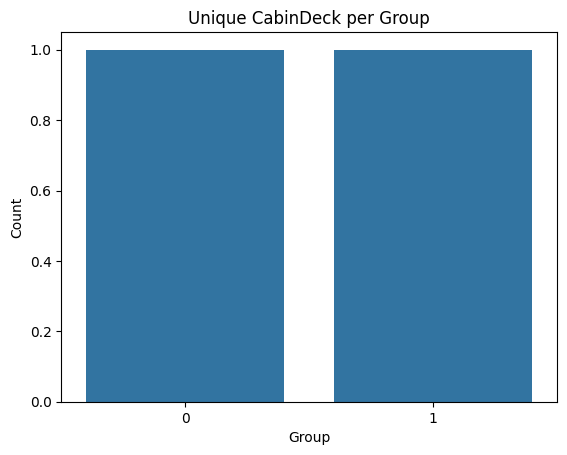

In [37]:
sns.countplot(data=grouped_by_unique_count, x='CabinSide')
plt.title('Unique CabinDeck per Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

## **Cabin Side from Group**

In [38]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['Group', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['Group'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'Group'].map(group_cabinside.idxmax(axis=1))

In [39]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,162,1.25
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Cabin Side from Last Name**

In [40]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['LastName', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['LastName'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'LastName'].map(group_cabinside.idxmax(axis=1))

In [41]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,65,0.50
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28


## **Missing Values by Letter U**

The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [42]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='U'

### **Train Set Missing Values**

In [43]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CryoSleep,310,2.39
Age,270,2.08
AgeGroup,270,2.08
VIP,296,2.28
